In [1]:
import camelot as cm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [3]:
base_educacion = pd.read_csv( r'../outcomes/base_completa_panel.csv')
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,rate_approv,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,236.0,87.0,16.0,6.0,14.500000,14.750000,14.681818,1.0,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,311.0,73.5,23.0,4.5,16.333333,13.521739,13.981818,2.0,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,1.000000,260.0,64.5,18.0,4.5,14.333333,14.444444,14.422222,2.0,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.833333,206.0,58.5,16.0,4.5,13.000000,12.875000,12.902439,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,245.0,90.0,17.0,5.5,16.363636,14.411765,14.888889,1.0,1
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,267.0,91.5,17.0,5.5,16.636364,15.705882,15.933333,1.0,1
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [437]:
base_educacion[['ave_gc', 'ave_fc', 'ave_total','rate_approv']][base_educacion.period == 1].describe()


,ave_gc,ave_fc,ave_total,rate_approv
count,"1,047.00","1,046.00","1,056.00","1,056.00"
mean,14.22,13.79,13.89,0.92
std,3.40,3.60,3.42,0.21
min,0.00,0.00,0.00,0.00
25%,14.00,13.75,13.83,1.00
50%,15.00,14.67,14.76,1.00
75%,15.80,15.56,15.56,1.00
max,18.40,18.88,18.40,1.00


In [438]:
base_educacion[['ave_gc', 'ave_fc', 'ave_total','rate_approv']][base_educacion.period == 2].describe()

,ave_gc,ave_fc,ave_total,rate_approv
count,"1,226.00","1,229.00","1,234.00","1,234.00"
mean,12.78,12.64,12.69,0.82
std,5.52,5.50,5.41,0.34
min,0.00,0.00,0.00,0.00
25%,13.64,13.25,12.91,0.88
50%,15.25,15.00,15.02,1.00
75%,16.00,15.86,15.86,1.00
max,18.00,19.00,18.09,1.00


### Lower average grade neither general, field course or general grade, besides grades show greater dispersion

Text(0.5, 1.0, 'All courses average')

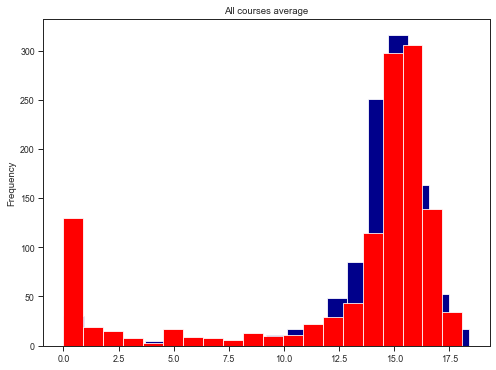

In [78]:
sns.set('paper')
sns.set_style("ticks")

base_educacion['ave_total'][base_educacion['period'] == 1.0].plot(kind = 'hist', bins = 20, figsize = (8,6), color = 'darkblue')
base_educacion['ave_total'][base_educacion['period'] == 2.0].plot(kind = 'hist', bins = 20, figsize = (8,6), color = 'red')
plt.title('All courses average')

Text(0.5, 0, '')

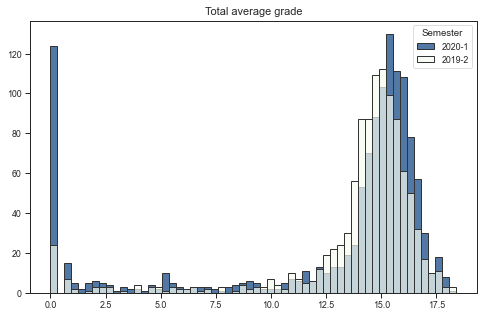

In [475]:
fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )

plt.legend(labels=['2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

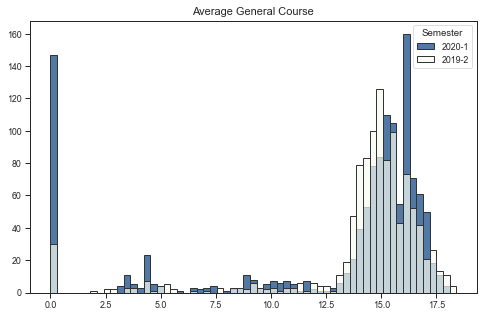

In [473]:
fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data =base_educacion,
            x = 'ave_gc',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )

plt.legend(labels=['2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Average General Course', size=11)
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

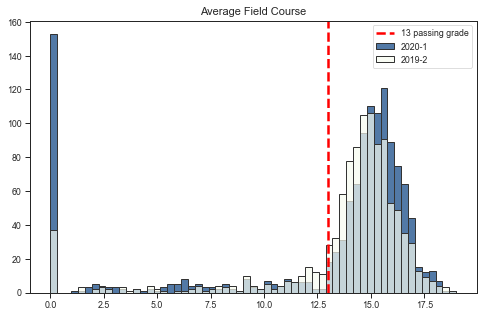

In [477]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.histplot(data =base_educacion,
            x = 'ave_fc',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 passing grade','2020-1','2019-2'], frameon=True)
plt.title('Average Field Course', size=11)
plt.ylabel('')
plt.xlabel('')

### The distribution of grades does not show an increase in failed students but rather a significant dropout of students

Text(0.5, 0, 'Semester')

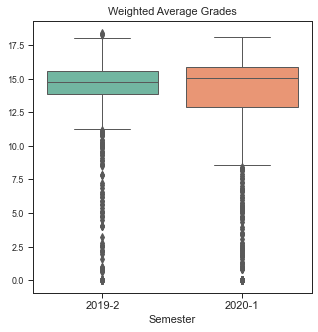

In [461]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_total",
                 data=base_educacion,
                 linewidth= 1, palette="Set2")

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average Grades', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

Text(0.5, 0, 'Semester')

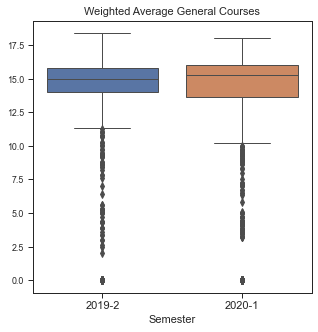

In [460]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_gc",
                 data=base_educacion,
                 linewidth= 1)

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average General Courses', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

Text(0.5, 0, 'Semester')

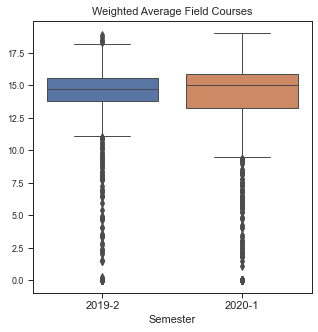

In [459]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_fc",
                 data=base_educacion,
                 linewidth= 1)

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average Field Courses', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

### The greater dispersion of the notes is corroborated. No greater dispersion is identified between the weighted average in general or field course

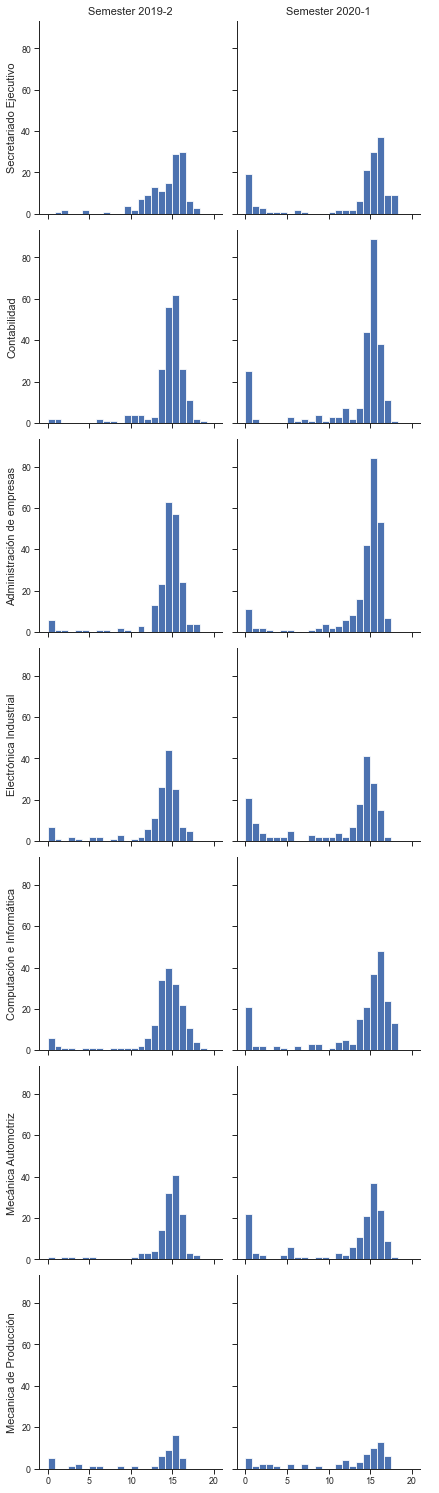

In [488]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist, "ave_total", bins=np.linspace(0, 20, 25), color = 'b')


grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrónica Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

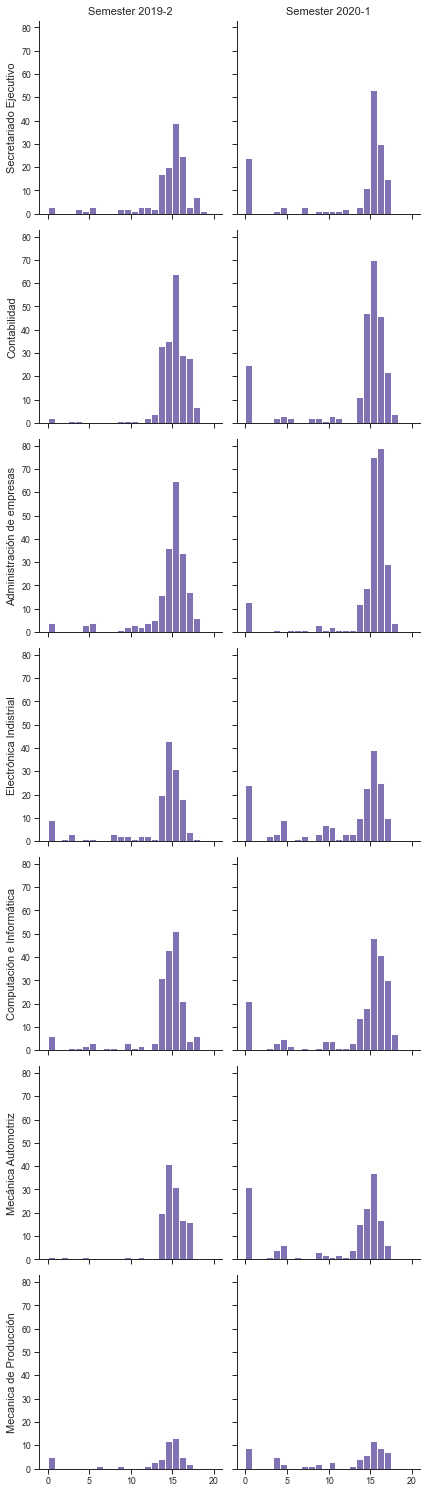

In [456]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist, "ave_gc", bins=np.linspace(0, 20, 25), color = 'm', linewidth=1)

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrónica Indistrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

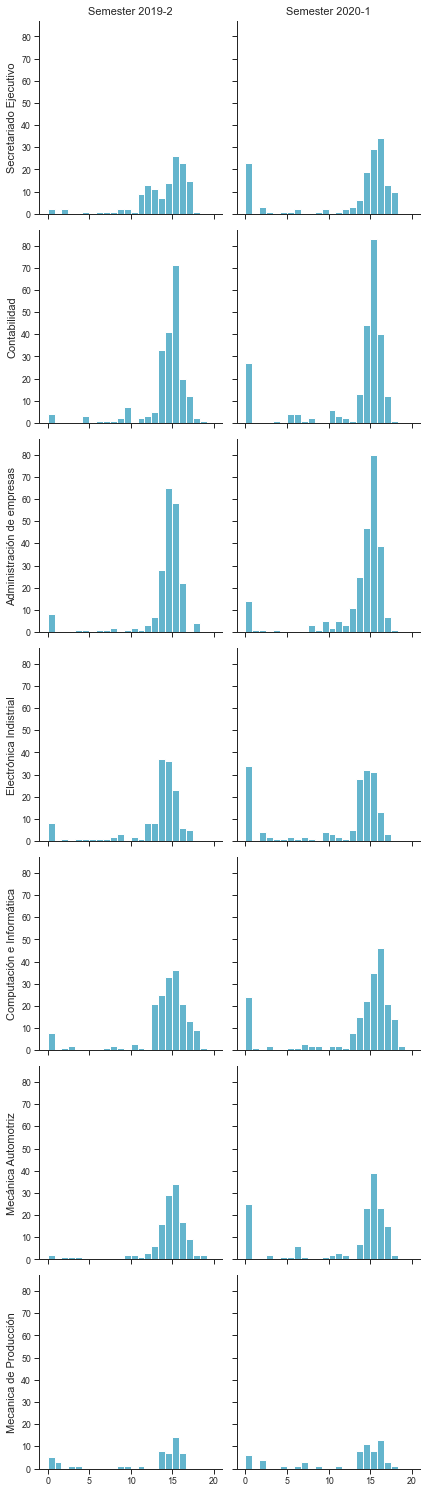

In [455]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist,  "ave_fc", bins=np.linspace(0, 20, 25), color = 'c', linewidth=1)
grid.set_titles(row_template = ' ')

axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrónica Indistrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

### An increase in student desertion in most careers but in Production Mechanics remains

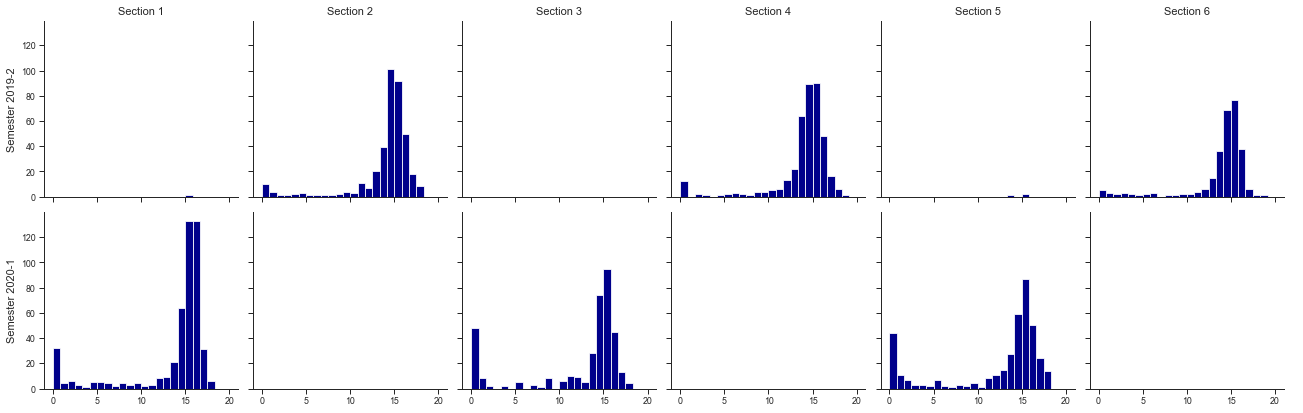

In [454]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="period", col="section", margin_titles=True)
grid.map(plt.hist, "ave_total", bins=np.linspace(0, 20, 25), color="darkblue")
grid.set_titles(row_template = ' ')

axes = grid.axes.flatten()
axes[0].set_title("Section 1", size=11)
axes[1].set_title("Section 2", size=11)
axes[2].set_title("Section 3", size=11)
axes[3].set_title("Section 4", size=11)
axes[4].set_title("Section 5", size=11)
axes[5].set_title("Section 6", size=11)

axes = grid.axes.flatten()
axes[0].set_ylabel("Semester 2019-2", size=11)
axes[6].set_ylabel("Semester 2020-1", size=11)
for ax in axes:
    ax.set_xlabel("")

### Due to the fact that the admission of new students takes place once a year, even and odd sections are divided the academic year: first, third and fifth section in the first part and the rest in the second part of the year.

### Semester 2020-1 only has 3 sections (1,3 and 5)

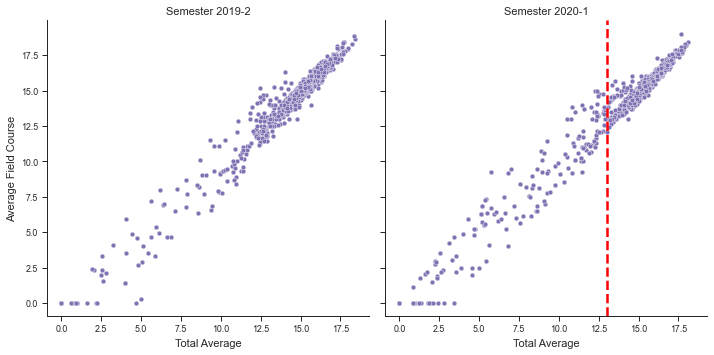

In [485]:
fg1 = sns.relplot(data=base_educacion, x="ave_total", y="ave_fc", col = 'period', kind="scatter", color = 'm')

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')

axes = fg1.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

axes = fg1.axes.flatten()
axes[0].set_ylabel("Average Field Course", size=11)
for ax in axes:
    ax.set_xlabel("Total Average", size=11)

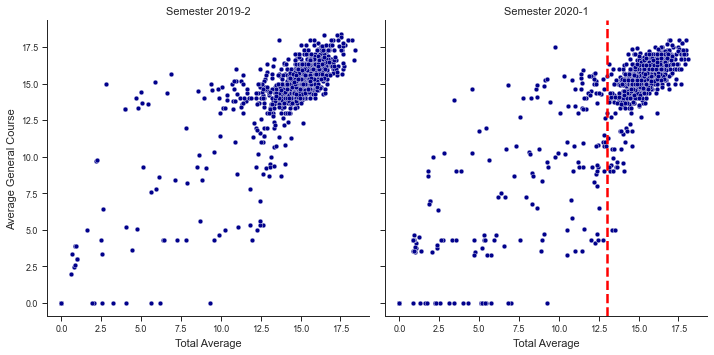

In [482]:
fg2 = sns.relplot(data=base_educacion, x="ave_total", y="ave_gc", col = 'period', kind="scatter", color = 'darkblue')

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
axes = fg2.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

axes = fg2.axes.flatten()
axes[0].set_ylabel("Average General Course", size=11)
for ax in axes:
    ax.set_xlabel("Total Average", size=11)

### The total average is determined by the field courses. A greater dispersion is evidenced in the average grades of general courses for the case of disapproved students.

Text(0.5, 0, '')

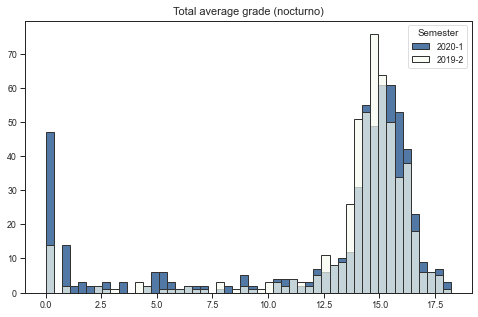

In [486]:
base1 = base_educacion[base_educacion['shift'] == "nocturno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.legend(labels=['2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade (nocturno)', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

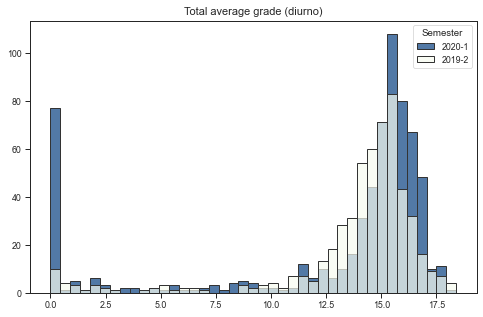

In [487]:
base1 = base_educacion[base_educacion['shift'] == "diurno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.legend(labels=['2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade (diurno)', size=11)
plt.ylabel('')
plt.xlabel('')

### There is evidence of a greater desertion of students in the diurno (day) shift. It is probably due to job search issues.

Text(0.5, 0, '')

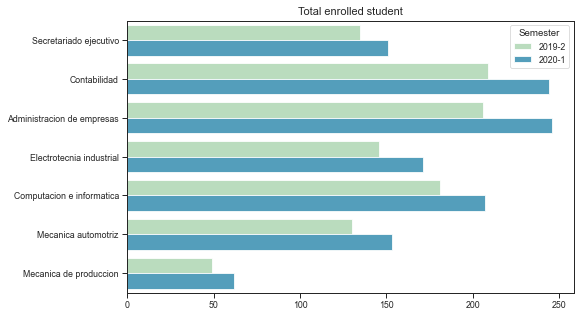

In [416]:
# enrolled student by carrer

fig, ax = plt.subplots(figsize=(8,5))

base =base_educacion[base_educacion.signup == 1]

ax = sns.countplot(y="carrera", hue="period", data=base, palette='GnBu')

plt.legend(labels=['2019-2','2020-1'],  title = "Semester", frameon=True)
plt.title('Total enrolled student', size=11)
plt.ylabel('')
plt.xlabel('')

### En todas la carreras hubo un incremento de alumnos matriculados para el 2020-1. Esto puede explicarse por la admisión anual. 

In [231]:
# enrolled student by carrer
base2 = base_educacion[(base_educacion.ave_total == 0)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='num_disaproved')
base2 

,carrera,period,num_disaproved
0,Administracion de empresas,1.0,6
1,Administracion de empresas,2.0,11
2,Computacion e informatica,1.0,6
3,Computacion e informatica,2.0,21
4,Contabilidad,1.0,2
5,Contabilidad,2.0,25
6,Electrotecnia industrial,1.0,5
7,Electrotecnia industrial,2.0,21
8,Mecanica automotriz,2.0,22
9,Mecanica de produccion,1.0,5


In [491]:

base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 1)].groupby( [ 'carrera'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 1)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

,carrera,num_disaproved,period,num_enrolled,percent_disaproved(%)
0,Administracion de empresas,6,1.00,206,2.91
1,Computacion e informatica,6,1.00,181,3.31
2,Contabilidad,2,1.00,209,0.96
3,Electrotecnia industrial,5,1.00,146,3.42
4,Mecanica de produccion,5,1.00,49,10.20


### Executive Secretariat and Production Mechanics do not show student desertion in 2019-2. The dropout of production mechanics is high even in the semester prior to 2020. 

In [439]:

base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4


,carrera,num_disaproved,period,num_enrolled,percent_disaproved(%)
0,Administracion de empresas,11,2.00,246,4.47
1,Computacion e informatica,21,2.00,207,10.14
2,Contabilidad,25,2.00,244,10.25
3,Electrotecnia industrial,21,2.00,171,12.28
4,Mecanica automotriz,22,2.00,153,14.38
5,Mecanica de produccion,5,2.00,62,8.06
6,Secretariado ejecutivo,19,2.00,151,12.58


In [440]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

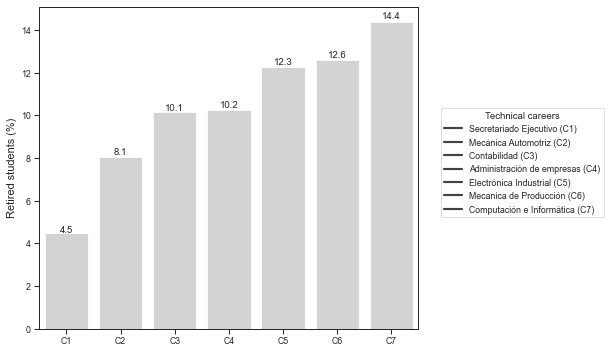

In [446]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x="carrera", y="percent_disaproved(%)", data=base4, color = 'lightgray',
                order=base4.sort_values('percent_disaproved(%)').carrera)

careers1 = ['C1','C2','C3', 'C4','C5', 'C6', 'C7']
careers2 = ['Secretariado Ejecutivo (C1)','Mecánica Automotriz (C2)','Contabilidad (C3)', 'Administración de empresas (C4)', 
           'Electrónica Industrial (C5)', 'Mecanica de Producción (C6)', 'Computación e Informática (C7)']

(ax.set_xticklabels(careers1))
plt.xlabel('')
plt.ylabel('Retired students (%)', size=11)
plt.tight_layout()
plt.legend(title='Technical careers', loc='upper right', labels=careers2, bbox_to_anchor=(1.5, 0.7), ncol=1)
show_values(ax)

### Careers that require the use of equipment and technology show a higher rate of student dropout (Computacion, Mecanica de producción y Electronica industrial). 
### Draw attention that Mecanica automotriz is in second place

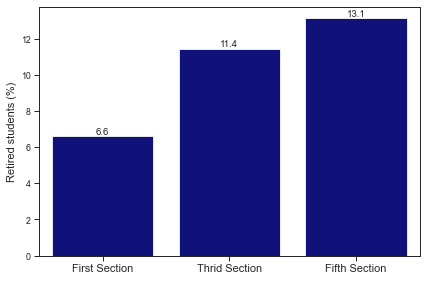

In [447]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'section'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'section', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'section')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

ax = sns.barplot(x="section", y="percent_disaproved(%)", data=base4, color = 'darkblue',
                order=base4.sort_values('percent_disaproved(%)').section)

(ax.set_xticklabels(["First Section", "Thrid Section", "Fifth Section"], size=11))
plt.xlabel('')
plt.tight_layout()
plt.ylabel('Retired students (%)', size=11)
show_values(ax)

### Advanced semester students show a higher rate of student desertion

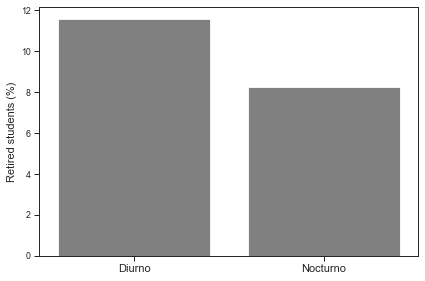

In [448]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'shift'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'shift', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'shift')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

ax = sns.barplot(x="shift", y="percent_disaproved(%)", data=base4, color = 'gray')

(ax.set_xticklabels(["Diurno", "Nocturno"], size=11))
plt.xlabel('')
plt.ylabel('Retired students (%)', size=11)
plt.tight_layout()